## 코드보다 사고 과정이 더 중요해!!!

1. 오염된 이미지(broken_image)와 크기가 같은 랜덤 텐서(random_tensor)를 생성한다. 
(랜덤 텐서는 오염된 이미지와 크기가 같은 무작위 이미지 텐서를 의미)

2. 랜덤 텐서를 weird_function( 함수에 입력해 똑같이 오염된 이미지를 가설(hypothesis)라고 부른다.

    a. [사실] 원본 이미지가 weird_function()함수에 입력되어 오염된 이미지를 출력했다.
    b. [사실] 인위적으로 생성한 무작위 이미지가 weird_function()함수에 입력되어 가설을 출력했다.

3. 가설과 오염된 이미지가 같다면, 무작위 이미지와 원본 이미지도 같을 것이다.

4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다.


In [1]:
import torch
print(torch.__version__)

1.3.0+cu100


In [2]:
pip install torchtext

In [3]:
x = torch.tensor([[1,2,3], [4,5,6], [7, 8, 9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [4]:
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [5]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [6]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [7]:
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [8]:
try:
    x = x.view(2, 4)
except Exception as e:
    print(e) # 에러 출력

shape '[2, 4]' is invalid for input of size 9


In [9]:
import torch

w = torch.randn(5, 3, dtype = torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 1.2806, -0.6124,  1.9772],
        [-1.2123, -0.5512, -0.1859],
        [ 0.9994, -0.2813, -0.4478],
        [ 1.3004, -1.4080,  1.0119],
        [ 2.3385,  1.6540, -1.3317]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [10]:
b = torch.randn(5, 2, dtype = torch.float)
print("b size:", b.size())
print("b:", b)

b size: torch.Size([5, 2])
b: tensor([[-0.1354, -1.2180],
        [-1.1827,  2.4816],
        [ 0.9671, -0.4118],
        [-1.5343,  0.4201],
        [ 0.1176,  0.2192]])


In [11]:
wx = torch.mm(w, x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ 9.3293, 11.9746],
        [-3.7951, -5.7445],
        [-2.0835, -1.8132],
        [ 2.1362,  3.0406],
        [ 0.6417,  3.3024]])


In [12]:
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[ 9.1939, 10.7567],
        [-4.9778, -3.2628],
        [-1.1164, -2.2251],
        [ 0.6019,  3.4607],
        [ 0.7593,  3.5216]])


In [0]:
w = torch.tensor(1.0, requires_grad = True)

In [0]:
a = w * 3

In [0]:
l = a ** 2

In [16]:
l.backward()
print('l을 w로 미분한 값은 {}'.format(w.grad))

l을 w로 미분한 값은 18.0


In [0]:
import torch
import pickle
import matplotlib.pyplot as plt

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


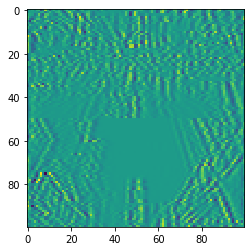

In [19]:
broken_image = torch.FloatTensor(pickle.load(open('/content/drive/My Drive/DL/3_min_pytorch_master/03_ANN/broken_image_t.p', 'rb'), encoding = 'latin1'))
plt.imshow(broken_image.view(100, 100))

In [0]:
def weird_function(x, n_iter = 5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [0]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [0]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [0]:
lr = 0.8

In [0]:
for i in range(0, 20000):
    random_tensor.requires_grad_(True)

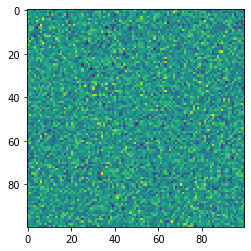

In [25]:
hypothesis = weird_function(random_tensor)
loss = distance_loss(hypothesis, broken_image)
loss.backward()
with torch.no_grad():
    random_tensor = random_tensor - lr*random_tensor.grad
if i % 1000 == 0:
    print('Loss at {} = {}'.format(i, loss.item()))
plt.imshow(random_tensor.view(100, 100).data)

In [0]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [0]:
n_dim = 2
x_train, y_train = make_blobs(n_samples = 80, n_features = n_dim,
                              centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]], shuffle = True, cluster_std = 0.3)
x_test, y_test = make_blobs(n_samples = 20, n_features = n_dim,
                            centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]], 
                            shuffle = True, cluster_std = 0.3)

In [0]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

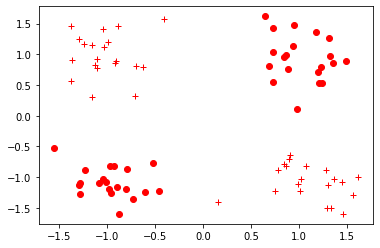

In [32]:
def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor = 'none', markeredgecolor = c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+ '+')
plt.figure()
vis_data(x_train, y_train, c = 'r')
plt.show()

In [0]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [0]:
class NeuralNet(torch.nn.Module):

    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [0]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss() # 이진 교차 엔트로피

In [0]:
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [38]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7233114242553711


In [39]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7176607847213745
Train loss at 100 is 0.632588267326355
Train loss at 200 is 0.5764504671096802
Train loss at 300 is 0.5157748460769653
Train loss at 400 is 0.45077815651893616
Train loss at 500 is 0.37903133034706116
Train loss at 600 is 0.3007313013076782
Train loss at 700 is 0.22646138072013855
Train loss at 800 is 0.1686774492263794
Train loss at 900 is 0.1289733350276947
Train loss at 1000 is 0.10219816863536835
Train loss at 1100 is 0.08390186727046967
Train loss at 1200 is 0.07038825750350952
Train loss at 1300 is 0.06045392155647278
Train loss at 1400 is 0.053036801517009735
Train loss at 1500 is 0.047284409403800964
Train loss at 1600 is 0.04269993677735329
Train loss at 1700 is 0.03894227743148804
Train loss at 1800 is 0.03579633682966232
Train loss at 1900 is 0.03311724215745926


In [41]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.021137624979019165


In [42]:
torch.save(model.state_dict(), '/content/drive/My Drive/DL/3_min_pytorch_master/03_ANN/model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.2059, -1.3016],
        [-1.2877,  0.4309],
        [ 1.4699,  1.0560],
        [-1.2000, -1.2990],
        [ 1.3922, -1.7027]])), ('linear_1.bias', tensor([-0.2585,  1.0226,  0.2666, -0.2596, -0.3552])), ('linear_2.weight', tensor([[-1.7588,  1.6578, -1.8117, -1.6985,  2.1498]])), ('linear_2.bias', tensor([0.1634]))])


In [43]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('/content/drive/My Drive/DL/3_min_pytorch_master/03_ANN/model.pt'))

<All keys matched successfully>

In [46]:
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1, 1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9910565614700317
